<a href="https://colab.research.google.com/gist/pouyahosseinzadeh/351236def97908160df68713f3dd5679/fat-lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FAT-LSTM

In [1]:
import pandas as pd
import numpy as np
import time


In [2]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [3]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [4]:
data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes

<ipython-input-4-aaa1d577f240>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes


In [5]:
data1 = data1.reset_index(drop = True)

In [6]:
NSEP_start_index = len(SEP_df) + 1

In [7]:
data1['event'] = 'SEP'
data1.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all1 = data1
my_data_all1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,event
0,0.00470,0.00486,0.00575,0.00528,0.00575,0.00486,0.00579,0.00456,0.00546,0.00486,...,0.00516,0.00479,0.00524,0.00506,0.00486,0.00555,0.00506,0.00630,0.00540,SEP
1,0.00482,0.00586,0.00419,0.00501,0.00569,0.00470,0.00434,0.00442,0.00420,0.00465,...,0.00427,0.00434,0.00494,0.00465,0.00499,0.00614,0.00389,0.00419,0.00470,SEP
2,0.00434,0.00441,0.00374,0.00367,0.00383,0.00307,0.00419,0.00442,0.00369,0.00471,...,0.00398,0.00427,0.00501,0.00501,0.00388,0.00337,0.00449,0.00456,0.00494,SEP
3,0.00465,0.00362,0.00456,0.00314,0.00465,0.00362,0.00419,0.00404,0.00398,0.00412,...,0.00367,0.00391,0.00442,0.00531,0.00405,0.00465,0.00427,0.00337,0.00478,SEP
4,0.00367,0.00374,0.00359,0.00427,0.00479,0.00404,0.00463,0.00382,0.00494,0.00448,...,0.00501,0.00471,0.00571,0.00494,0.00449,0.00389,0.00362,0.00374,0.00471,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.00344,0.00354,0.00232,0.00299,0.00326,0.00277,0.00322,0.00239,0.00247,0.00284,...,0.00333,0.00299,0.00277,0.00369,0.00277,0.00314,0.00277,0.00231,0.00359,NSEP
92,0.00337,0.00322,0.00253,0.00352,0.00292,0.00232,0.00210,0.00269,0.00307,0.00260,...,0.00262,0.00359,0.00268,0.00382,0.00314,0.00282,0.00292,0.00150,0.00292,NSEP
93,0.00268,0.00329,0.00344,0.00311,0.00277,0.00367,0.00329,0.00354,0.00247,0.00322,...,0.00268,0.00307,0.00187,0.00304,0.00247,0.00239,0.00304,0.00329,0.00262,NSEP
94,0.00311,0.00202,0.00352,0.00284,0.00383,0.00329,0.00232,0.00289,0.00299,0.00269,...,0.00246,0.00277,0.00329,0.00188,0.00224,0.00269,0.00292,0.00246,0.00337,NSEP


In [8]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [9]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [10]:
data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes

<ipython-input-10-4cb82d44f847>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes


In [11]:
data2 = data2.reset_index(drop = True)

In [12]:
NSEP_start_index = len(SEP_df) + 1

In [13]:
data2['event'] = 'SEP'
data2.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all2 = data2
my_data_all2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,event
0,0.0,0.000000,0.0,1517.5963,0.0,1522.7899,0.000000,1381.5040,0.0,0.0,...,0.0,0.0,0.371358,0.0,0.0,1559.8687,1451.2338,0.0,0.0,SEP
1,0.0,0.000000,0.0,1518.5792,0.0,1523.9524,0.000000,1382.6090,0.0,0.0,...,0.0,0.0,0.362733,0.0,0.0,1561.0952,1452.4220,0.0,0.0,SEP
2,0.0,0.000000,0.0,1759.7799,0.0,1766.4614,0.000000,1594.8754,0.0,0.0,...,0.0,0.0,0.464466,0.0,0.0,1811.2853,1679.2502,0.0,0.0,SEP
3,0.0,0.061787,0.0,1754.9634,0.0,1761.4526,0.000000,1591.3519,0.0,0.0,...,0.0,0.0,0.482031,0.0,0.0,1805.8094,1675.0897,0.0,0.0,SEP
4,0.0,0.000000,0.0,1697.8419,0.0,1704.0801,0.000000,1539.8455,0.0,0.0,...,0.0,0.0,0.462952,0.0,0.0,1747.1146,1620.7069,0.0,0.0,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.0,0.004296,0.0,1930.5219,0.0,1937.8096,0.021121,1747.4928,0.0,0.0,...,0.0,0.0,0.526685,0.0,0.0,1987.9065,1841.3267,0.0,0.0,NSEP
92,0.0,0.070770,0.0,1945.6710,0.0,1952.9968,0.000000,1761.3417,0.0,0.0,...,0.0,0.0,0.495011,0.0,0.0,2003.0612,1855.5891,0.0,0.0,NSEP
93,0.0,0.029904,0.0,1915.8229,0.0,1923.0168,0.000000,1734.9430,0.0,0.0,...,0.0,0.0,0.453755,0.0,0.0,1972.4113,1827.7220,0.0,0.0,NSEP
94,0.0,0.011149,0.0,1874.6545,0.0,1881.6160,0.000000,1697.9891,0.0,0.0,...,0.0,0.0,0.420948,0.0,0.0,1929.8181,1788.5812,0.0,0.0,NSEP


In [14]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all1['event']
X1 = my_data_all1.drop(columns=['event'])

y2 = my_data_all2['event']
X2 = my_data_all2.drop(columns=['event'])





In [15]:
span = 60
my_image_length = 60

In [16]:
import numpy as np
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.layers import Input, Dense, concatenate, LSTM, Attention, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

In [17]:
import numpy as np
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.layers import Input, Dense, LSTM, Attention, Flatten, concatenate, Multiply, Add
from tensorflow.keras.models import Model
import tensorflow as tf

# Set random seeds for reproducibility
seed_value = 32
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Assuming you have loaded your data into y1, X1, y2, and X2

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_all = []
f1_all = []
precision_all = []
recall_all = []
lst_TSS_stratified_A_TSF = []
lst_HSS_stratified_A_TSF = []

index = 0
for train_index, test_index in skf.split(X1, y1):
    index = index + 1
    X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
    y_train1, y_test1 = y1.iloc[train_index], y1.iloc[test_index]

    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]

    label_encoder = LabelEncoder()
    y_train1 = label_encoder.fit_transform(y_train1)
    y_test1 = label_encoder.transform(y_test1)

    scaler = StandardScaler()
    X_train1 = scaler.fit_transform(X_train1)
    X_test1 = scaler.transform(X_test1)
    X_train2 = scaler.fit_transform(X_train2)
    X_test2 = scaler.transform(X_test2)

    lstm_input_shape = (X_train1.shape[1], 1)  # Adjust input shape for LSTM
    input_modality1 = Input(shape=lstm_input_shape)
    input_modality2 = Input(shape=lstm_input_shape)

    lstm_modality1 = LSTM(128, return_sequences=True)(input_modality1)
    lstm_modality2 = LSTM(128, return_sequences=True)(input_modality2)

    # Gating mechanism
    gate_modality1 = Dense(128, activation='sigmoid')(lstm_modality1)
    gate_modality2 = Dense(128, activation='sigmoid')(lstm_modality2)

    # Apply gating to modality outputs
    gated_lstm_modality1 = Multiply()([lstm_modality1, gate_modality1])
    gated_lstm_modality2 = Multiply()([lstm_modality2, gate_modality2])

    self_attention_modality1 = Attention()([gated_lstm_modality1, gated_lstm_modality1])
    self_attention_modality2 = Attention()([gated_lstm_modality2, gated_lstm_modality2])

    weighted_sum_modality1 = Flatten()(tf.reduce_sum(self_attention_modality1 * gated_lstm_modality1, axis=1))
    weighted_sum_modality2 = Flatten()(tf.reduce_sum(self_attention_modality2 * gated_lstm_modality2, axis=1))

    # Learnable fusion layer
    fusion_layer = Dense(256, activation='relu')(concatenate([weighted_sum_modality1, weighted_sum_modality2]))

    output_layer = Dense(2, activation='softmax')(fusion_layer)

    model = Model(inputs=[input_modality1, input_modality2], outputs=output_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit([X_train1[:, :, np.newaxis], X_train2[:, :, np.newaxis]], y_train1, epochs=15, batch_size=16, verbose=1)

    predictions = model.predict([X_test1[:, :, np.newaxis], X_test2[:, :, np.newaxis]])
    y_pred = np.argmax(predictions, axis=1)

    accuracy_all.append(accuracy_score(y_test1, y_pred))
    f1_all.append(f1_score(y_test1, y_pred, average='macro'))
    precision_all.append(precision_score(y_test1, y_pred, average='macro'))
    recall_all.append(recall_score(y_test1, y_pred, average='macro'))
    tn, fp, fn, tp = confusion_matrix(y_test1, y_pred).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF.append(HSS_TSF_A)

# Calculate and print the average metrics over the folds
print("Average Accuracy:", np.mean(accuracy_all))
print("Average F1 Score:", np.mean(f1_all))
print("Average Precision:", np.mean(precision_all))
print("Average Recall:", np.mean(recall_all))
print("Average TSS:", np.mean(lst_TSS_stratified_A_TSF))
print("Average HSS:", np.mean(lst_HSS_stratified_A_TSF))


Epoch 1/15
5/5 [==============================] - 18s 313ms/step - loss: 0.6312 - accuracy: 0.5132
Epoch 2/15
5/5 [==============================] - 1s 184ms/step - loss: 0.5628 - accuracy: 0.5395
Epoch 3/15
5/5 [==============================] - 1s 225ms/step - loss: 0.6266 - accuracy: 0.6711
Epoch 4/15
5/5 [==============================] - 1s 226ms/step - loss: 0.5312 - accuracy: 0.7763
Epoch 5/15
5/5 [==============================] - 1s 198ms/step - loss: 0.5324 - accuracy: 0.8026
Epoch 6/15
5/5 [==============================] - 1s 167ms/step - loss: 0.5245 - accuracy: 0.8158
Epoch 7/15
5/5 [==============================] - 1s 209ms/step - loss: 0.5196 - accuracy: 0.8421
Epoch 8/15
5/5 [==============================] - 1s 192ms/step - loss: 0.4844 - accuracy: 0.8421
Epoch 9/15
5/5 [==============================] - 1s 173ms/step - loss: 0.4275 - accuracy: 0.8553
Epoch 10/15
5/5 [==============================] - 1s 106ms/step - loss: 0.4219 - accuracy: 0.8289
Epoch 11/15
5/5 [=

1/1 [==============================] - 2s 2s/step
Average Accuracy: 0.8752631578947367
Average F1 Score: 0.8739173842340486
Average Precision: 0.8869230769230769
Average Recall: 0.8744444444444444
Average TSS: 0.7488888888888889
Average HSS: 0.7498755009277078


## Visualization

In [18]:
import pandas as pd
import numpy as np

In [19]:
SEP_df = pd.read_csv("/content/sample_data/SEP_data_100MeV_Uni.csv", header = 0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [20]:
NSEP_df_78 = pd.read_csv("/content/sample_data/NSEP_data_P2_Uni.csv", header = 0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [21]:
data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes

<ipython-input-21-aaa1d577f240>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = SEP_df.append(NSEP_df_78) # append the two SEP and NSEP dataframes


In [22]:
data1 = data1.reset_index(drop = True)

In [23]:
NSEP_start_index = len(SEP_df) + 1

In [24]:
data1['event'] = 'SEP'
data1.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all1 = data1
my_data_all1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,event
0,0.00470,0.00486,0.00575,0.00528,0.00575,0.00486,0.00579,0.00456,0.00546,0.00486,...,0.00516,0.00479,0.00524,0.00506,0.00486,0.00555,0.00506,0.00630,0.00540,SEP
1,0.00482,0.00586,0.00419,0.00501,0.00569,0.00470,0.00434,0.00442,0.00420,0.00465,...,0.00427,0.00434,0.00494,0.00465,0.00499,0.00614,0.00389,0.00419,0.00470,SEP
2,0.00434,0.00441,0.00374,0.00367,0.00383,0.00307,0.00419,0.00442,0.00369,0.00471,...,0.00398,0.00427,0.00501,0.00501,0.00388,0.00337,0.00449,0.00456,0.00494,SEP
3,0.00465,0.00362,0.00456,0.00314,0.00465,0.00362,0.00419,0.00404,0.00398,0.00412,...,0.00367,0.00391,0.00442,0.00531,0.00405,0.00465,0.00427,0.00337,0.00478,SEP
4,0.00367,0.00374,0.00359,0.00427,0.00479,0.00404,0.00463,0.00382,0.00494,0.00448,...,0.00501,0.00471,0.00571,0.00494,0.00449,0.00389,0.00362,0.00374,0.00471,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.00344,0.00354,0.00232,0.00299,0.00326,0.00277,0.00322,0.00239,0.00247,0.00284,...,0.00333,0.00299,0.00277,0.00369,0.00277,0.00314,0.00277,0.00231,0.00359,NSEP
92,0.00337,0.00322,0.00253,0.00352,0.00292,0.00232,0.00210,0.00269,0.00307,0.00260,...,0.00262,0.00359,0.00268,0.00382,0.00314,0.00282,0.00292,0.00150,0.00292,NSEP
93,0.00268,0.00329,0.00344,0.00311,0.00277,0.00367,0.00329,0.00354,0.00247,0.00322,...,0.00268,0.00307,0.00187,0.00304,0.00247,0.00239,0.00304,0.00329,0.00262,NSEP
94,0.00311,0.00202,0.00352,0.00284,0.00383,0.00329,0.00232,0.00289,0.00299,0.00269,...,0.00246,0.00277,0.00329,0.00188,0.00224,0.00269,0.00292,0.00246,0.00337,NSEP


In [25]:
SEP_df_A = pd.read_csv("/content/sample_data/Sequence_100MeV.csv", header = 0, index_col=0)
# SEP_df = SEP_df.drop([78, 79, 80, 81])

In [26]:
NSEP_df_78_A = pd.read_csv("/content/sample_data/Sequence_NSEP.csv", header = 0, index_col=0)
# NSEP_df_78 = NSEP_df_78.drop([78, 79, 80, 80])

In [27]:
data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes

<ipython-input-27-4cb82d44f847>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2 = SEP_df_A.append(NSEP_df_78_A) # append the two SEP and NSEP dataframes


In [28]:
data2 = data2.reset_index(drop = True)

In [29]:
NSEP_start_index = len(SEP_df) + 1

In [30]:
data2['event'] = 'SEP'
data2.loc[NSEP_start_index:,['event']] = 'NSEP'
my_data_all2 = data2
my_data_all2

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,event
0,0.0,0.000000,0.0,1517.5963,0.0,1522.7899,0.000000,1381.5040,0.0,0.0,...,0.0,0.0,0.371358,0.0,0.0,1559.8687,1451.2338,0.0,0.0,SEP
1,0.0,0.000000,0.0,1518.5792,0.0,1523.9524,0.000000,1382.6090,0.0,0.0,...,0.0,0.0,0.362733,0.0,0.0,1561.0952,1452.4220,0.0,0.0,SEP
2,0.0,0.000000,0.0,1759.7799,0.0,1766.4614,0.000000,1594.8754,0.0,0.0,...,0.0,0.0,0.464466,0.0,0.0,1811.2853,1679.2502,0.0,0.0,SEP
3,0.0,0.061787,0.0,1754.9634,0.0,1761.4526,0.000000,1591.3519,0.0,0.0,...,0.0,0.0,0.482031,0.0,0.0,1805.8094,1675.0897,0.0,0.0,SEP
4,0.0,0.000000,0.0,1697.8419,0.0,1704.0801,0.000000,1539.8455,0.0,0.0,...,0.0,0.0,0.462952,0.0,0.0,1747.1146,1620.7069,0.0,0.0,SEP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.0,0.004296,0.0,1930.5219,0.0,1937.8096,0.021121,1747.4928,0.0,0.0,...,0.0,0.0,0.526685,0.0,0.0,1987.9065,1841.3267,0.0,0.0,NSEP
92,0.0,0.070770,0.0,1945.6710,0.0,1952.9968,0.000000,1761.3417,0.0,0.0,...,0.0,0.0,0.495011,0.0,0.0,2003.0612,1855.5891,0.0,0.0,NSEP
93,0.0,0.029904,0.0,1915.8229,0.0,1923.0168,0.000000,1734.9430,0.0,0.0,...,0.0,0.0,0.453755,0.0,0.0,1972.4113,1827.7220,0.0,0.0,NSEP
94,0.0,0.011149,0.0,1874.6545,0.0,1881.6160,0.000000,1697.9891,0.0,0.0,...,0.0,0.0,0.420948,0.0,0.0,1929.8181,1788.5812,0.0,0.0,NSEP


In [31]:
from sklearn.model_selection import StratifiedKFold



y1 = my_data_all1['event']
X1 = my_data_all1.drop(columns=['event'])

y2 = my_data_all2['event']
X2 = my_data_all2.drop(columns=['event'])





In [32]:
span = 60
my_image_length = 60

In [33]:
import numpy as np
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.layers import Input, Dense, concatenate, LSTM, Attention, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

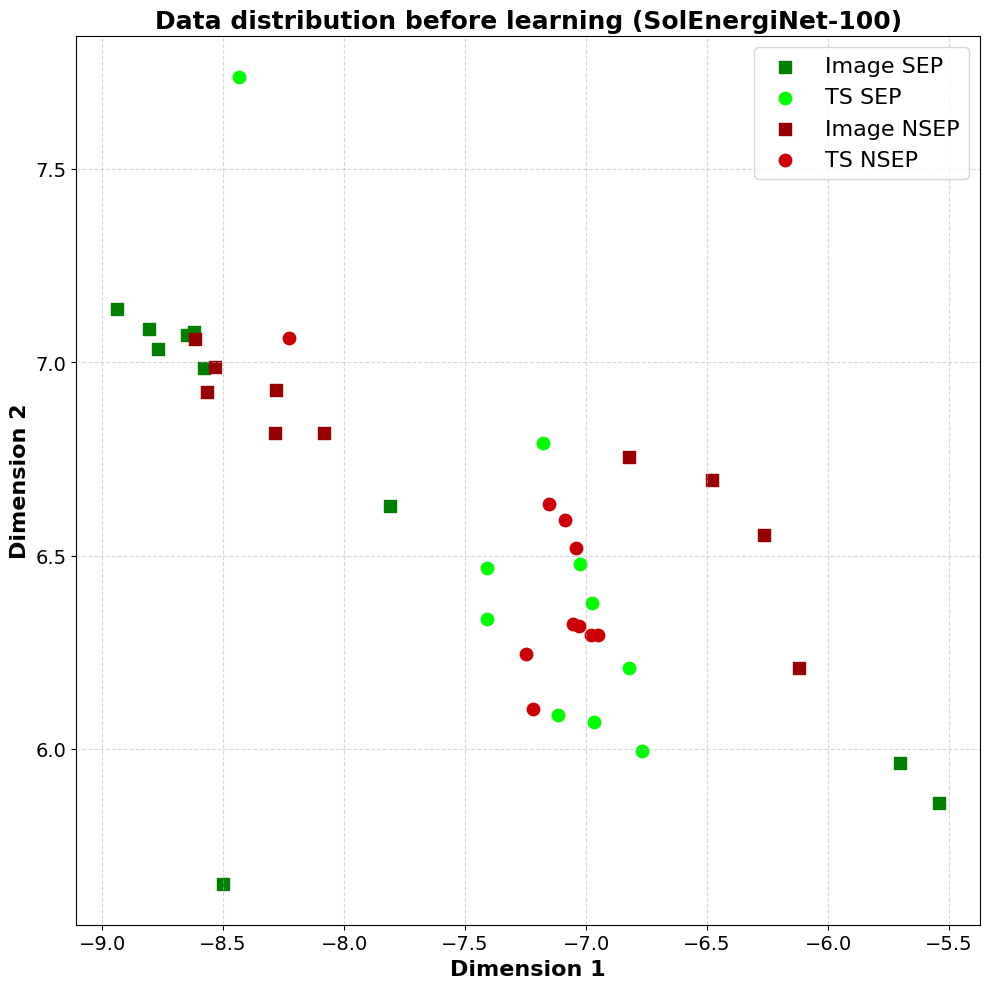

Epoch 1/15
5/5 [==============================] - 7s 94ms/step - loss: 0.6312 - accuracy: 0.5132
Epoch 2/15
5/5 [==============================] - 0s 98ms/step - loss: 0.5628 - accuracy: 0.5395
Epoch 3/15
5/5 [==============================] - 0s 93ms/step - loss: 0.6266 - accuracy: 0.6711
Epoch 4/15
5/5 [==============================] - 1s 158ms/step - loss: 0.5312 - accuracy: 0.7763
Epoch 5/15
5/5 [==============================] - 1s 162ms/step - loss: 0.5324 - accuracy: 0.8026
Epoch 6/15
5/5 [==============================] - 1s 163ms/step - loss: 0.5245 - accuracy: 0.8158
Epoch 7/15
5/5 [==============================] - 1s 155ms/step - loss: 0.5196 - accuracy: 0.8421
Epoch 8/15
5/5 [==============================] - 1s 97ms/step - loss: 0.4844 - accuracy: 0.8421
Epoch 9/15
5/5 [==============================] - 0s 94ms/step - loss: 0.4275 - accuracy: 0.8553
Epoch 10/15
5/5 [==============================] - 0s 97ms/step - loss: 0.4219 - accuracy: 0.8289
Epoch 11/15
5/5 [========

1/1 [==============================] - 1s 1s/step


<Figure size 1000x1000 with 0 Axes>

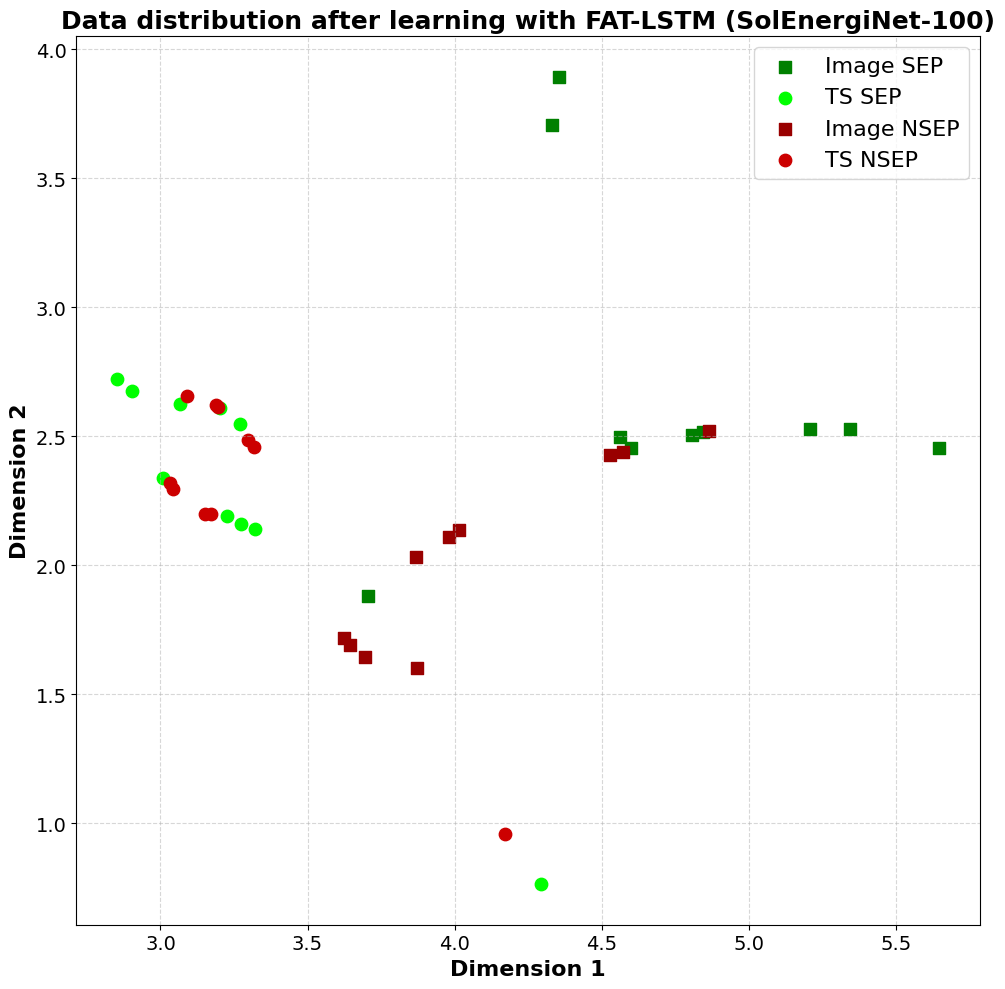

Average pairwise distance of SEP events before learning: 13.249205713596588
Average pairwise distance of NSEP events before learning: 1.1960575548245718
Average pairwise distance of SEP events after learning: 13.14380493246411
Average pairwise distance of NSEP events after learning: 0.5374158704824942
Percentage change in average pairwise distance of SEP events: 0.7955252821255013 %
Percentage change in average pairwise distance of NSEP events: 55.06772493391273 %
Average pairwise distance between all SEP and NSEP points before learning: 13.687229606306111
Average pairwise distance between all SEP and NSEP points after learning: 7.852422873418826
Percentage change in average pairwise distance between all SEP and NSEP points: 42.62956712729519 %


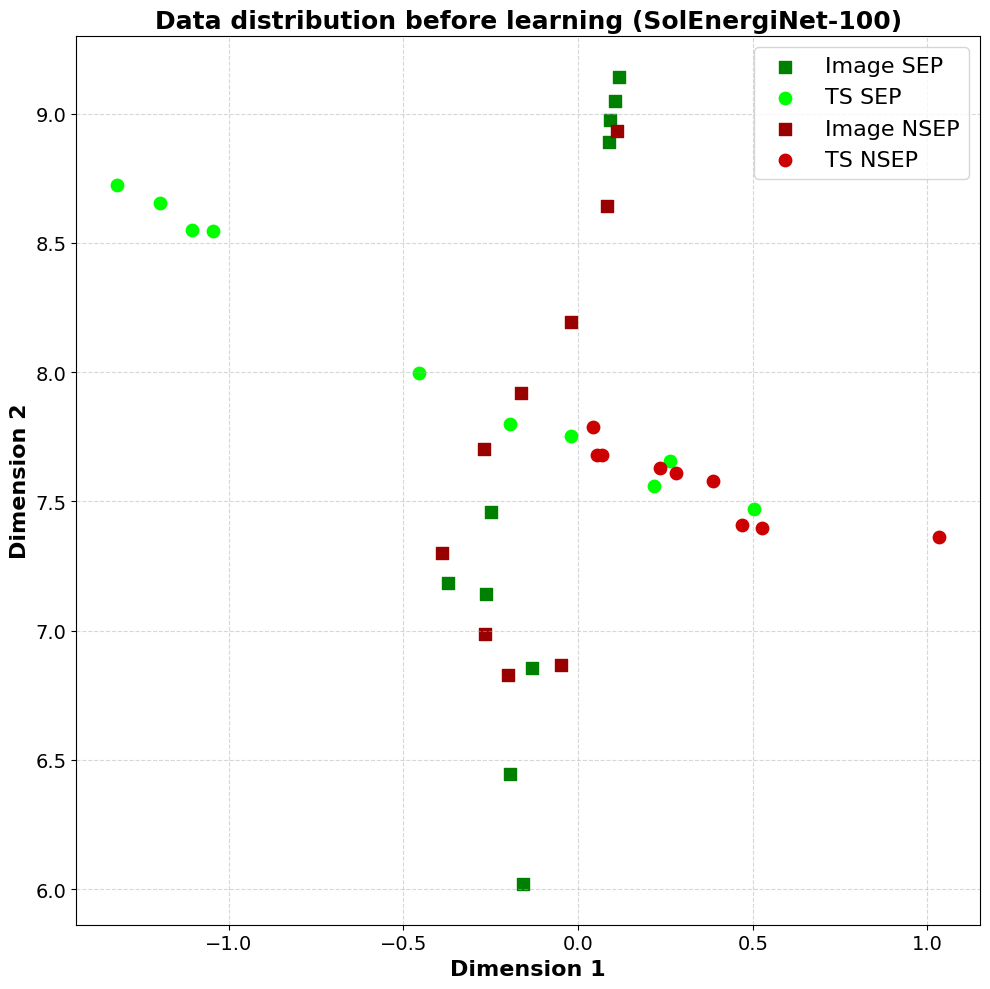

Epoch 1/15
5/5 [==============================] - 7s 108ms/step - loss: 0.6607 - accuracy: 0.7013
Epoch 2/15
5/5 [==============================] - 1s 118ms/step - loss: 0.5838 - accuracy: 0.6104
Epoch 3/15
5/5 [==============================] - 1s 108ms/step - loss: 0.5883 - accuracy: 0.6623
Epoch 4/15
5/5 [==============================] - 1s 100ms/step - loss: 0.5595 - accuracy: 0.7532
Epoch 5/15
5/5 [==============================] - 1s 106ms/step - loss: 0.5482 - accuracy: 0.7403
Epoch 6/15
5/5 [==============================] - 1s 101ms/step - loss: 0.5277 - accuracy: 0.7662
Epoch 7/15
5/5 [==============================] - 0s 96ms/step - loss: 0.5145 - accuracy: 0.8312
Epoch 8/15
5/5 [==============================] - 1s 120ms/step - loss: 0.5173 - accuracy: 0.7922
Epoch 9/15
5/5 [==============================] - 1s 111ms/step - loss: 0.4926 - accuracy: 0.8312
Epoch 10/15
5/5 [==============================] - 1s 105ms/step - loss: 0.4374 - accuracy: 0.8312
Epoch 11/15
5/5 [===

<Figure size 1000x1000 with 0 Axes>

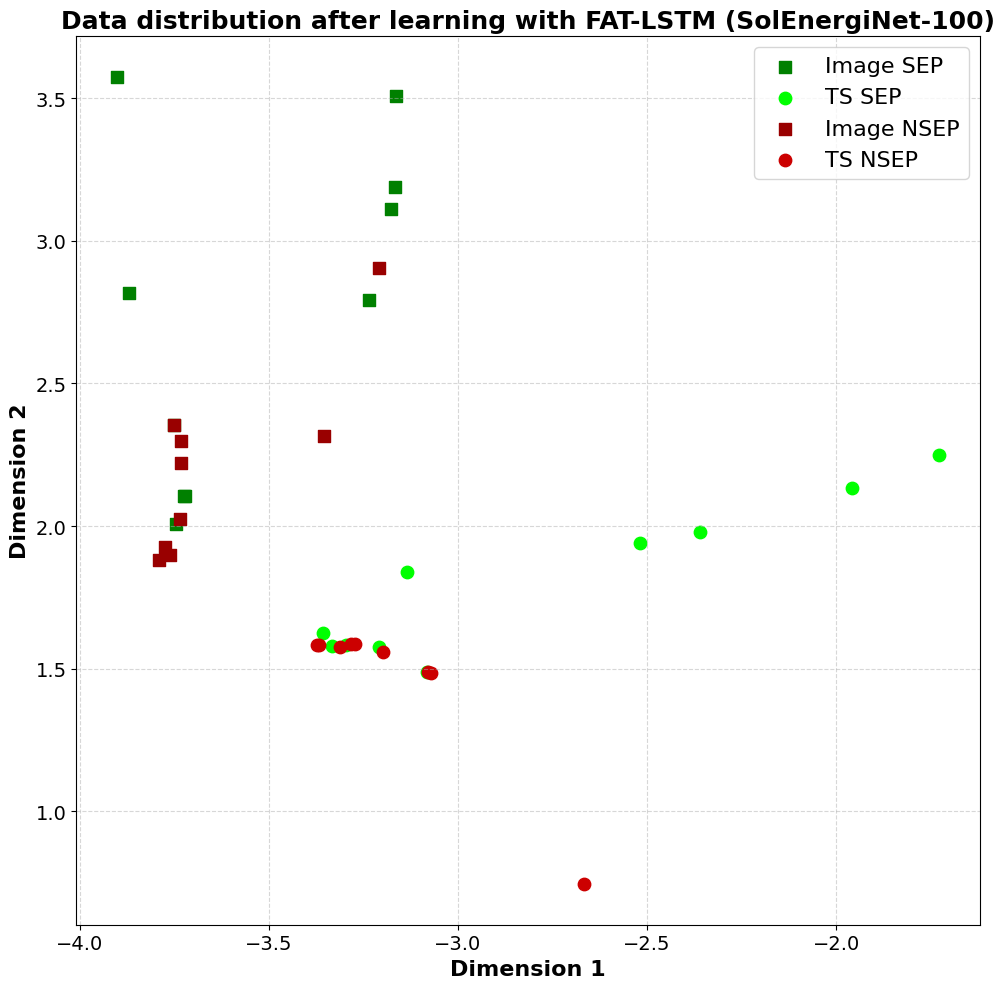

Average pairwise distance of SEP events before learning: 1.7274125913109042
Average pairwise distance of NSEP events before learning: 0.2356868639917058
Average pairwise distance of SEP events after learning: 0.5871726104265286
Average pairwise distance of NSEP events after learning: 1.4344402003396106
Percentage change in average pairwise distance of SEP events: 66.00854865941824 %
Percentage change in average pairwise distance of NSEP events: -508.621191713973 %
Average pairwise distance between all SEP and NSEP points before learning: 0.6104702769757453
Average pairwise distance between all SEP and NSEP points after learning: 1.130523158960001
Percentage change in average pairwise distance between all SEP and NSEP points: -85.18889479117394 %


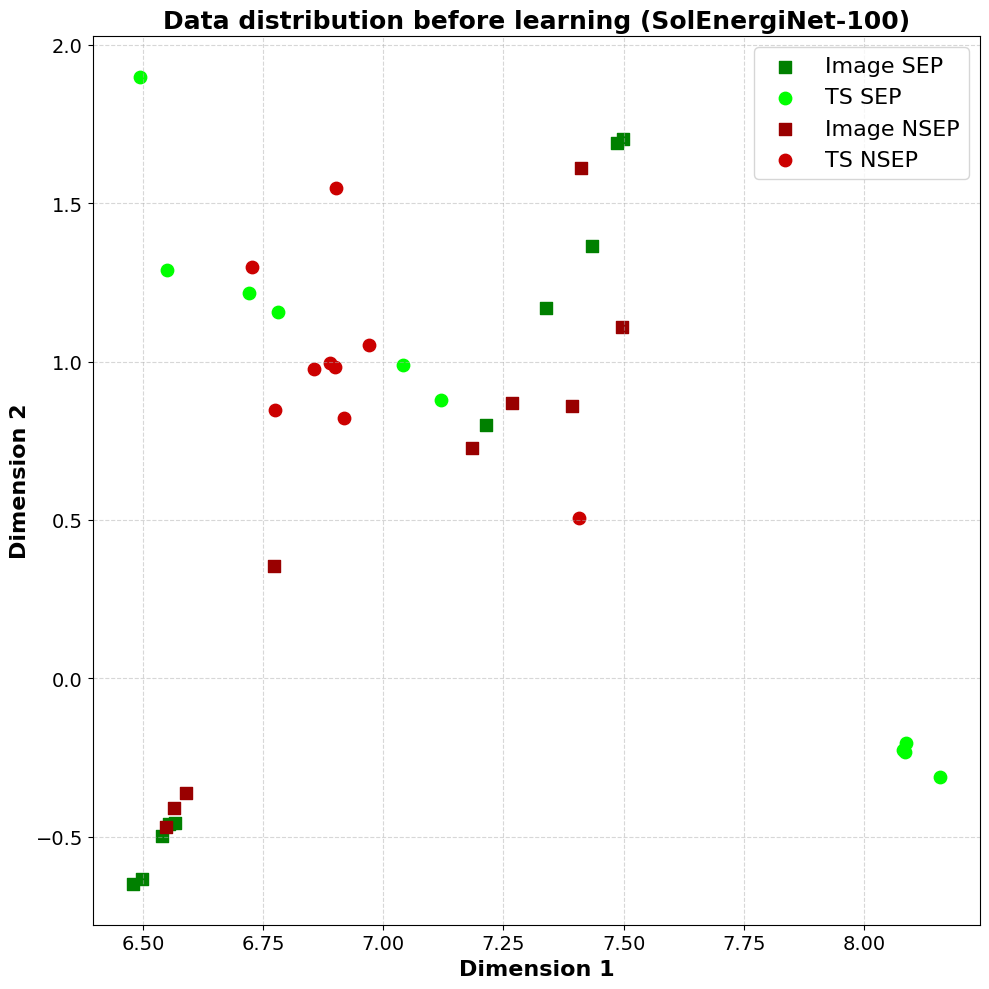

Epoch 1/15
5/5 [==============================] - 8s 169ms/step - loss: 0.6639 - accuracy: 0.7143
Epoch 2/15
5/5 [==============================] - 1s 120ms/step - loss: 0.5793 - accuracy: 0.5974
Epoch 3/15
5/5 [==============================] - 1s 103ms/step - loss: 0.6098 - accuracy: 0.6883
Epoch 4/15
5/5 [==============================] - 1s 96ms/step - loss: 0.5837 - accuracy: 0.7792
Epoch 5/15
5/5 [==============================] - 1s 108ms/step - loss: 0.5705 - accuracy: 0.8052
Epoch 6/15
5/5 [==============================] - 1s 116ms/step - loss: 0.5276 - accuracy: 0.7662
Epoch 7/15
5/5 [==============================] - 1s 108ms/step - loss: 0.5224 - accuracy: 0.7532
Epoch 8/15
5/5 [==============================] - 1s 114ms/step - loss: 0.4801 - accuracy: 0.8312
Epoch 9/15
5/5 [==============================] - 1s 106ms/step - loss: 0.4476 - accuracy: 0.8442
Epoch 10/15
5/5 [==============================] - 1s 106ms/step - loss: 0.4275 - accuracy: 0.8312
Epoch 11/15
5/5 [===

<Figure size 1000x1000 with 0 Axes>

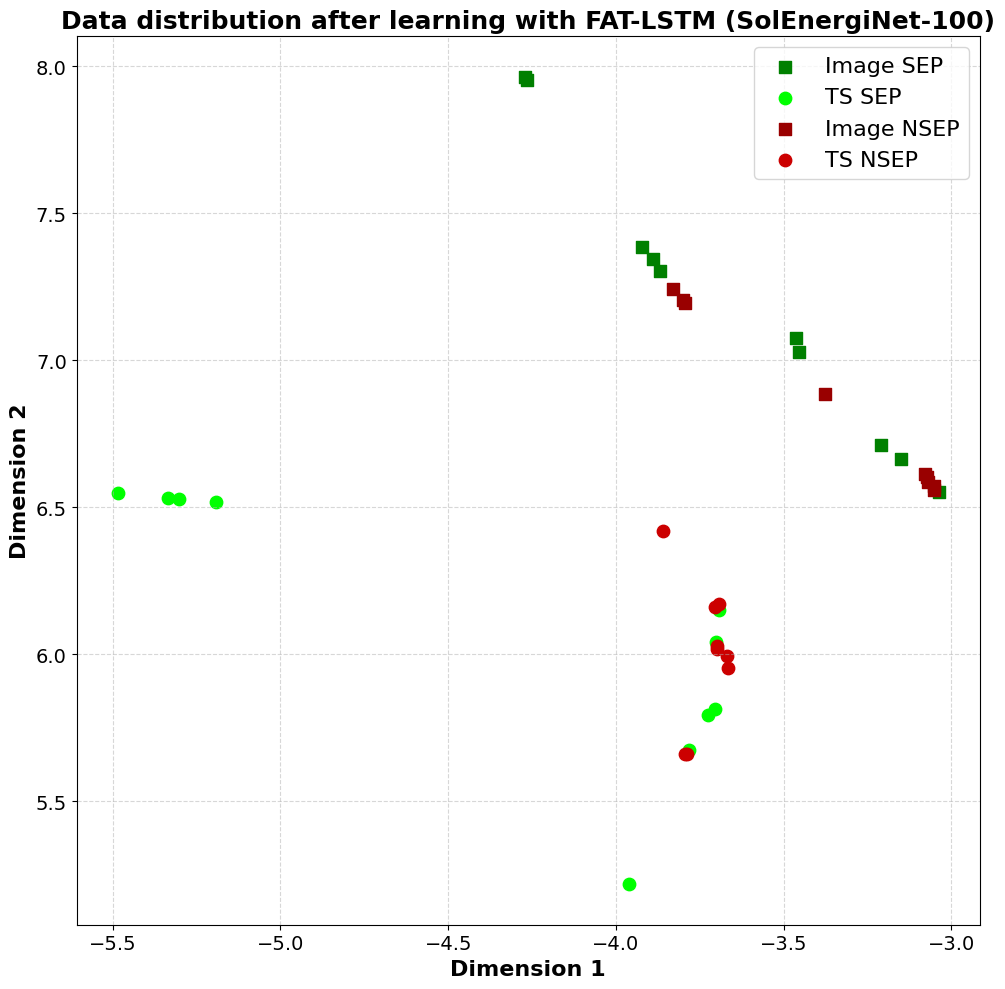

Average pairwise distance of SEP events before learning: 1.5034243485988363
Average pairwise distance of NSEP events before learning: 0.404499360032264
Average pairwise distance of SEP events after learning: 0.6169546678783481
Average pairwise distance of NSEP events after learning: 1.195062088695687
Percentage change in average pairwise distance of SEP events: 58.96337128946073 %
Percentage change in average pairwise distance of NSEP events: -195.44226932778477 %
Average pairwise distance between all SEP and NSEP points before learning: 0.6300796588839592
Average pairwise distance between all SEP and NSEP points after learning: 1.1589186623444017
Percentage change in average pairwise distance between all SEP and NSEP points: -83.93208636462867 %


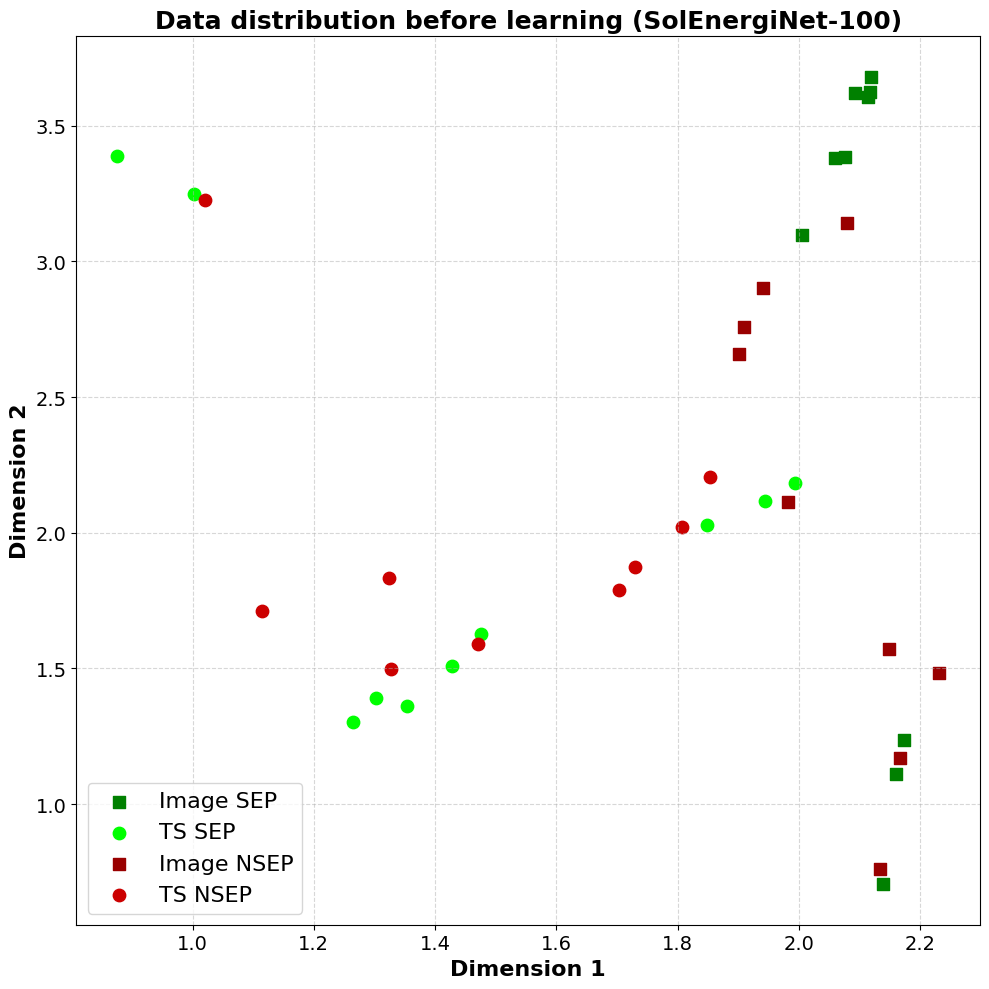

Epoch 1/15
5/5 [==============================] - 6s 164ms/step - loss: 0.6499 - accuracy: 0.6494
Epoch 2/15
5/5 [==============================] - 1s 148ms/step - loss: 0.5798 - accuracy: 0.6623
Epoch 3/15
5/5 [==============================] - 2s 367ms/step - loss: 0.5754 - accuracy: 0.7013
Epoch 4/15
5/5 [==============================] - 1s 184ms/step - loss: 0.5602 - accuracy: 0.7662
Epoch 5/15
5/5 [==============================] - 1s 167ms/step - loss: 0.5383 - accuracy: 0.7662
Epoch 6/15
5/5 [==============================] - 1s 102ms/step - loss: 0.5145 - accuracy: 0.7532
Epoch 7/15
5/5 [==============================] - 1s 103ms/step - loss: 0.4914 - accuracy: 0.7403
Epoch 8/15
5/5 [==============================] - 1s 114ms/step - loss: 0.4709 - accuracy: 0.8312
Epoch 9/15
5/5 [==============================] - 1s 113ms/step - loss: 0.4439 - accuracy: 0.8312
Epoch 10/15
5/5 [==============================] - 1s 100ms/step - loss: 0.4141 - accuracy: 0.8182
Epoch 11/15
5/5 [==

<Figure size 1000x1000 with 0 Axes>

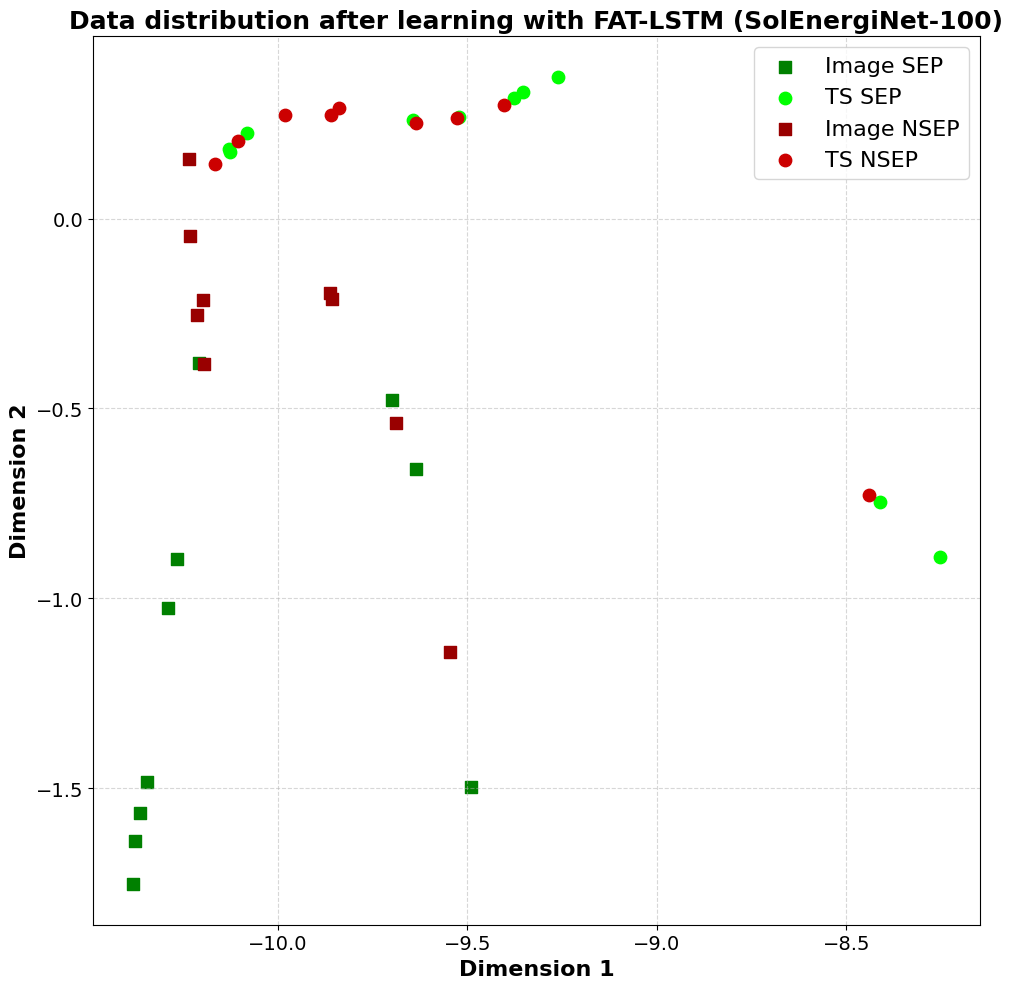

Average pairwise distance of SEP events before learning: 1.2298576100999
Average pairwise distance of NSEP events before learning: 0.3950768422237993
Average pairwise distance of SEP events after learning: 0.6745155031591306
Average pairwise distance of NSEP events after learning: 0.8923546543361194
Percentage change in average pairwise distance of SEP events: 45.15499212105209 %
Percentage change in average pairwise distance of NSEP events: -125.8686308499517 %
Average pairwise distance between all SEP and NSEP points before learning: 0.8018891863162823
Average pairwise distance between all SEP and NSEP points after learning: 0.9656014704946809
Percentage change in average pairwise distance between all SEP and NSEP points: -20.41582390335752 %


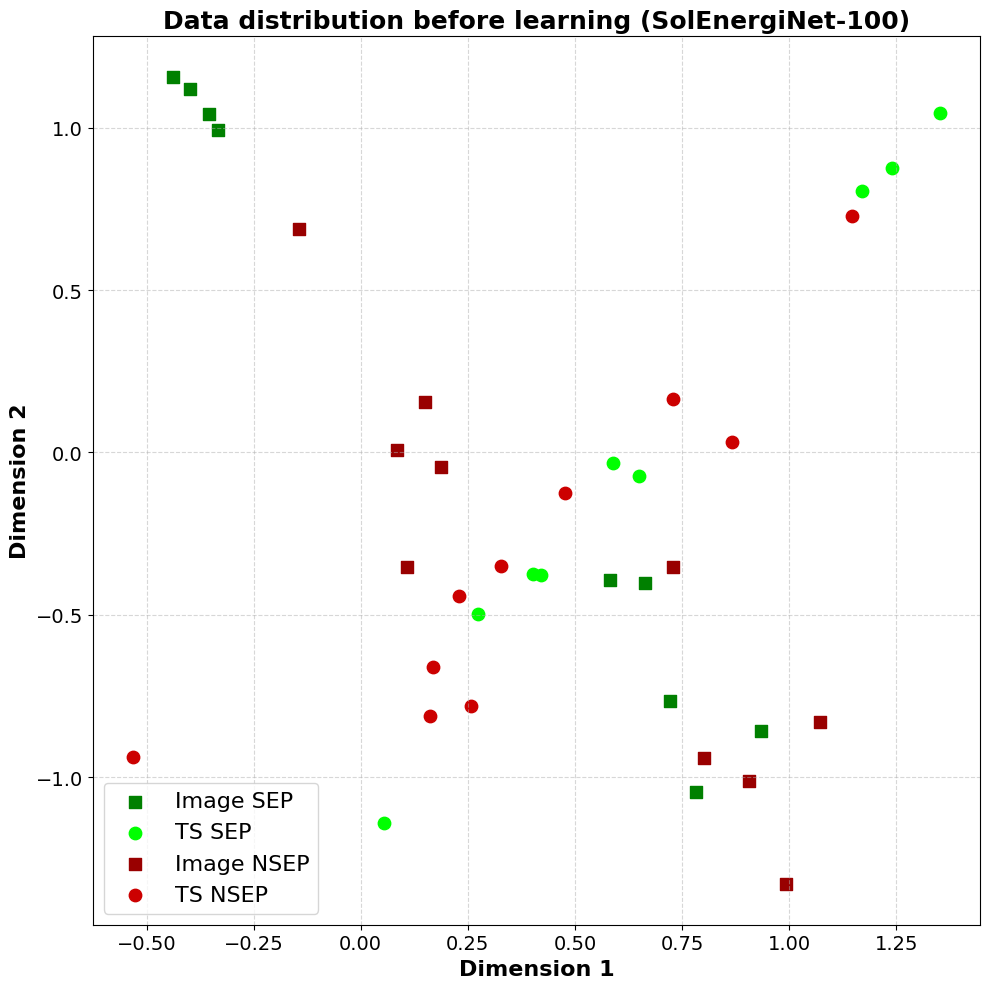

Epoch 1/15
5/5 [==============================] - 7s 103ms/step - loss: 0.6404 - accuracy: 0.6234
Epoch 2/15
5/5 [==============================] - 1s 112ms/step - loss: 0.5667 - accuracy: 0.6364
Epoch 3/15
5/5 [==============================] - 1s 113ms/step - loss: 0.6648 - accuracy: 0.7013
Epoch 4/15
5/5 [==============================] - 1s 110ms/step - loss: 0.5625 - accuracy: 0.8182
Epoch 5/15
5/5 [==============================] - 1s 108ms/step - loss: 0.5580 - accuracy: 0.7792
Epoch 6/15
5/5 [==============================] - 1s 115ms/step - loss: 0.5463 - accuracy: 0.7403
Epoch 7/15
5/5 [==============================] - 1s 119ms/step - loss: 0.5235 - accuracy: 0.7532
Epoch 8/15
5/5 [==============================] - 1s 133ms/step - loss: 0.4963 - accuracy: 0.8182
Epoch 9/15
5/5 [==============================] - 1s 185ms/step - loss: 0.4751 - accuracy: 0.8182
Epoch 10/15
5/5 [==============================] - 1s 193ms/step - loss: 0.4508 - accuracy: 0.8312
Epoch 11/15
5/5 [==

<Figure size 1000x1000 with 0 Axes>

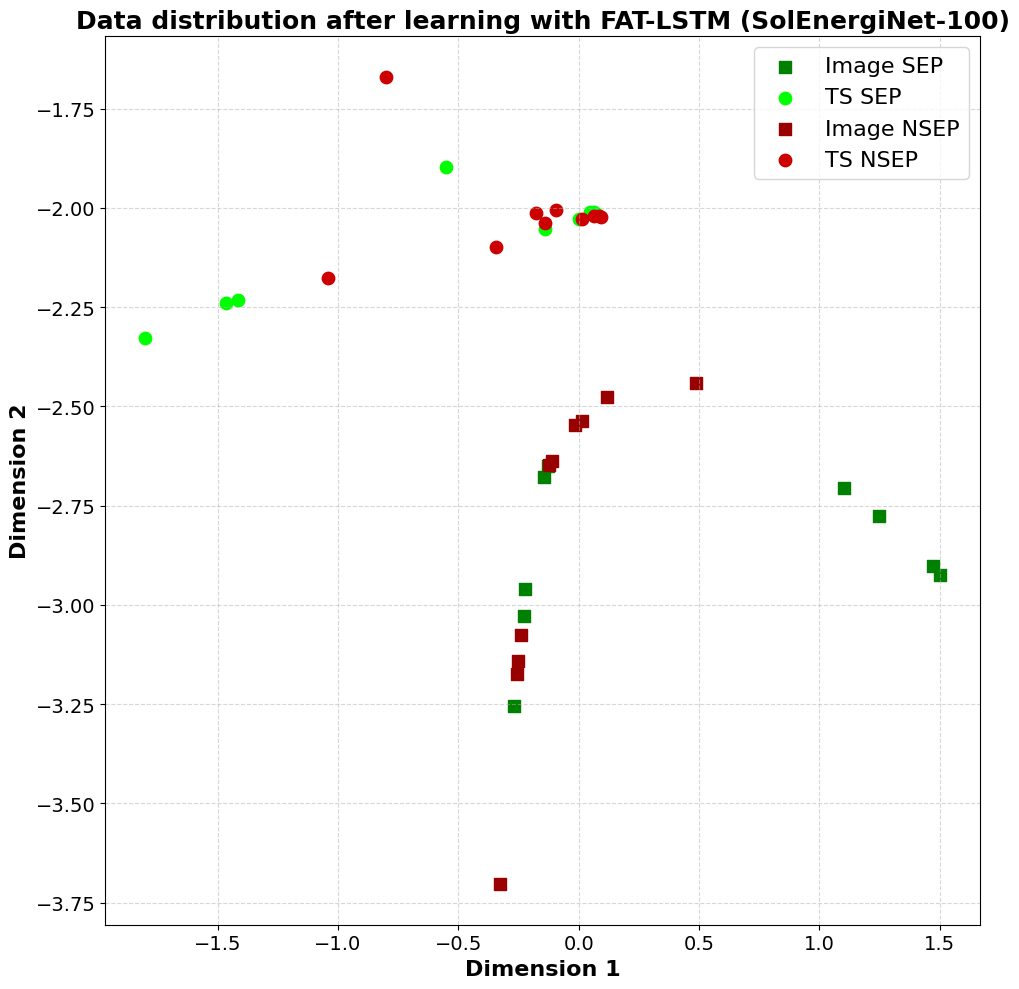

Average pairwise distance of SEP events before learning: 1.1709281921058017
Average pairwise distance of NSEP events before learning: 0.23051026061814475
Average pairwise distance of SEP events after learning: 0.7378860909794048
Average pairwise distance of NSEP events after learning: 0.6055661549884281
Percentage change in average pairwise distance of SEP events: 36.98280595222601 %
Percentage change in average pairwise distance of NSEP events: -162.70681112611638 %
Average pairwise distance between all SEP and NSEP points before learning: 0.8431231107065638
Average pairwise distance between all SEP and NSEP points after learning: 0.7592017407793074
Percentage change in average pairwise distance between all SEP and NSEP points: 9.953631784203811 %
Average Accuracy: 0.8752631578947367
Average F1 Score: 0.8739173842340486
Average Precision: 0.8869230769230769
Average Recall: 0.8744444444444444
Average TSS: 0.7488888888888889
Average HSS: 0.7498755009277078


In [34]:
import numpy as np
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.layers import Input, Dense, LSTM, Attention, Flatten, concatenate, Multiply
from tensorflow.keras.models import Model
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Set random seeds for reproducibility
seed_value = 32
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Assuming you have loaded your data into y1, X1, y2, and X2

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_all = []
f1_all = []
precision_all = []
recall_all = []
lst_TSS_stratified_A_TSF = []
lst_HSS_stratified_A_TSF = []

index = 0
self_attention_modality1_outputs_all = []
self_attention_modality2_outputs_all = []

# Define the base filename for the PDFs
base_filename = 'tSNE_plot-5h-L60-100MeV-fold'

for train_index, test_index in skf.split(X1, y1):
    index = index + 1
    X_train1, X_test1 = X1.iloc[train_index], X1.iloc[test_index]
    y_train1, y_test1 = y1.iloc[train_index], y1.iloc[test_index]

    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]

    label_encoder = LabelEncoder()
    y_train1 = label_encoder.fit_transform(y_train1)
    y_test1 = label_encoder.transform(y_test1)

    scaler = StandardScaler()
    X_train1 = scaler.fit_transform(X_train1)
    X_test1 = scaler.transform(X_test1)
    X_train2 = scaler.fit_transform(X_train2)
    X_test2 = scaler.transform(X_test2)






    # Combine the attention outputs from both modalities
    combined_data_modality1 = X_test1
    combined_data_modality2 = X_test2

    # Assign labels to differentiate classes
    labels_modality1 = y_test1  # Use actual modality 1 labels
    labels_modality2 = y_test1  # Use actual modality 2 labels

    SEP1 = np.where(labels_modality1 == 1)[0]
    SEP_df_A = combined_data_modality1[SEP1]

    NSEP1 = np.where(labels_modality1 == 0)[0]
    NSEP_df_78_A = combined_data_modality1[NSEP1]

    SEP2 = np.where(labels_modality2 == 1)[0]
    SEP_df_B = combined_data_modality2[SEP2]

    NSEP2 = np.where(labels_modality2 == 0)[0]
    NSEP_df_78_B = combined_data_modality2[NSEP2]

    # Concatenate the datasets vertically
    combined_data1 = concatenated_array = np.concatenate((SEP_df_A, SEP_df_B), axis=0)
    # combined_data1 = combined_data1.reset_index(drop=True)
    combined_data2 = concatenated_array = np.concatenate((NSEP_df_78_A, NSEP_df_78_B), axis=0)
    # combined_data2 = combined_data2.reset_index(drop=True)
    combined_data_all = np.concatenate((combined_data1, combined_data2), axis=0)
    # combined_data_all = combined_data_all.reset_index(drop=True)

    # Handle NaN values in the combined dataset
    # combined_data_all = combined_data_all.dropna()

    # Assign labels to differentiate classes
    labels_A = np.zeros(SEP_df_A.shape[0])
    labels_B = np.ones(SEP_df_B.shape[0])
    labels_C = np.ones(NSEP_df_78_A.shape[0]) * 2
    labels_D = np.ones(NSEP_df_78_B.shape[0]) * 3

    # Combine the labels
    labels = np.concatenate((labels_A, labels_B, labels_C, labels_D))

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_data_all)

    # Apply t-SNE on the scaled data
    tsne = TSNE(n_components=2, random_state=42)
    tsne_data = tsne.fit_transform(scaled_data)

    # Create a scatter plot of the t-SNE results with different colors/markers for each class
    plt.figure(figsize=(10, 10))
    plt.scatter(tsne_data[labels == 0, 0], tsne_data[labels == 0, 1], label='Image SEP', c='#008000', marker='s', s=80)
    plt.scatter(tsne_data[labels == 1, 0], tsne_data[labels == 1, 1], label='TS SEP', c='#00FF00', marker='o', s=80)
    plt.scatter(tsne_data[labels == 2, 0], tsne_data[labels == 2, 1], label='Image NSEP', c='#990000', marker='s', s=80)
    plt.scatter(tsne_data[labels == 3, 0], tsne_data[labels == 3, 1], label='TS NSEP', c='#CC0000', marker='o', s=80)

    # Set larger font size and make labels bold for scatter plot legend
    legend_labels = ['Image SEP', 'TS SEP', 'Image NSEP', 'TS NSEP']
    legend = plt.legend(legend_labels, fontsize=14)

    plt.xlabel('Dimension 1', fontsize=16, fontweight='bold')
    plt.ylabel('Dimension 2', fontsize=16, fontweight='bold')
    plt.title(f'Data distribution before learning (SolEnergiNet-100)', fontsize=18, fontweight='bold')
    plt.legend(fontsize=16)

    # Set larger font size for x and y axis ticks
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    pdf_filename_before = f"{base_filename}_{index}_before.pdf"
    plt.savefig(pdf_filename_before, dpi=300)
    plt.show()











    lstm_input_shape = (X_train1.shape[1], 1)  # Adjust input shape for LSTM
    input_modality1 = Input(shape=lstm_input_shape)
    input_modality2 = Input(shape=lstm_input_shape)

    lstm_modality1 = LSTM(128, return_sequences=True)(input_modality1)
    lstm_modality2 = LSTM(128, return_sequences=True)(input_modality2)

    # Gating mechanism
    gate_modality1 = Dense(128, activation='sigmoid')(lstm_modality1)
    gate_modality2 = Dense(128, activation='sigmoid')(lstm_modality2)

    # Apply gating to modality outputs
    gated_lstm_modality1 = Multiply()([lstm_modality1, gate_modality1])
    gated_lstm_modality2 = Multiply()([lstm_modality2, gate_modality2])

    self_attention_modality1 = Attention()([gated_lstm_modality1, gated_lstm_modality1])
    self_attention_modality2 = Attention()([gated_lstm_modality2, gated_lstm_modality2])

    weighted_sum_modality1 = Flatten()(tf.reduce_sum(self_attention_modality1 * gated_lstm_modality1, axis=1))
    weighted_sum_modality2 = Flatten()(tf.reduce_sum(self_attention_modality2 * gated_lstm_modality2, axis=1))

    fusion_layer = Dense(256, activation='relu')(concatenate([weighted_sum_modality1, weighted_sum_modality2]))
    output_layer = Dense(2, activation='softmax')(fusion_layer)

    model = Model(inputs=[input_modality1, input_modality2], outputs=output_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    self_attention_modality1_model = Model(inputs=model.inputs, outputs=weighted_sum_modality1)
    self_attention_modality2_model = Model(inputs=model.inputs, outputs=weighted_sum_modality2)

    model.fit([X_train1[:, :, np.newaxis], X_train2[:, :, np.newaxis]], y_train1, epochs=15, batch_size=16, verbose=1)

    self_attention_modality1_outputs = self_attention_modality1_model.predict([X_test1[:, :, np.newaxis], X_test2[:, :, np.newaxis]])
    self_attention_modality1_outputs_all.append(self_attention_modality1_outputs)
    self_attention_modality2_outputs = self_attention_modality2_model.predict([X_test1[:, :, np.newaxis], X_test2[:, :, np.newaxis]])
    self_attention_modality2_outputs_all.append(self_attention_modality2_outputs)

    predictions = model.predict([X_test1[:, :, np.newaxis], X_test2[:, :, np.newaxis]])
    y_pred = np.argmax(predictions, axis=1)

    accuracy_all.append(accuracy_score(y_test1, y_pred))
    f1_all.append(f1_score(y_test1, y_pred, average='macro'))
    precision_all.append(precision_score(y_test1, y_pred, average='macro'))
    recall_all.append(recall_score(y_test1, y_pred, average='macro'))
    tn, fp, fn, tp = confusion_matrix(y_test1, y_pred).ravel()
    TSS_TSF_A = (tp/(tp+fn)) - (fp/(fp+tn))
    lst_TSS_stratified_A_TSF.append(TSS_TSF_A)
    HSS_TSF_A = (2*((tp*tn) - (fn*fp))) / (((tp+fn) * (fn+tn)) + ((fp+tn) * (tp+fp)))
    lst_HSS_stratified_A_TSF.append(HSS_TSF_A)

    # Plot self_attention_modality1_outputs and self_attention_modality2_outputs
    plt.figure(figsize=(10, 10))

    # Combine the attention outputs from both modalities
    combined_data_modality1 = self_attention_modality1_outputs
    combined_data_modality2 = self_attention_modality2_outputs

    SEP1 = np.where(labels_modality1 == 1)[0]
    SEP_df_A = combined_data_modality1[SEP1]

    NSEP1 = np.where(labels_modality1 == 0)[0]
    NSEP_df_78_A = combined_data_modality1[NSEP1]

    SEP2 = np.where(labels_modality2 == 1)[0]
    SEP_df_B = combined_data_modality2[SEP2]

    NSEP2 = np.where(labels_modality2 == 0)[0]
    NSEP_df_78_B = combined_data_modality2[NSEP2]

    # Concatenate the datasets vertically
    combined_data1 = concatenated_array = np.concatenate((SEP_df_A, SEP_df_B), axis=0)
    # combined_data1 = combined_data1.reset_index(drop=True)
    combined_data2 = concatenated_array = np.concatenate((NSEP_df_78_A, NSEP_df_78_B), axis=0)
    # combined_data2 = combined_data2.reset_index(drop=True)
    combined_data_all = np.concatenate((combined_data1, combined_data2), axis=0)
    # combined_data_all = combined_data_all.reset_index(drop=True)

    # Handle NaN values in the combined dataset
    # combined_data_all = combined_data_all.dropna()

    # Assign labels to differentiate classes
    labels_A = np.zeros(SEP_df_A.shape[0])
    labels_B = np.ones(SEP_df_B.shape[0])
    labels_C = np.ones(NSEP_df_78_A.shape[0]) * 2
    labels_D = np.ones(NSEP_df_78_B.shape[0]) * 3

    # Combine the labels
    labels = np.concatenate((labels_A, labels_B, labels_C, labels_D))

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_data_all)

    # Apply t-SNE on the scaled data
    tsne = TSNE(n_components=2, random_state=42)
    tsne_data = tsne.fit_transform(scaled_data)

    # Create a scatter plot of the t-SNE results with different colors/markers for each class
    plt.figure(figsize=(10, 10))
    plt.scatter(tsne_data[labels == 0, 0], tsne_data[labels == 0, 1], label='Image SEP', c='#008000', marker='s', s=80)
    plt.scatter(tsne_data[labels == 1, 0], tsne_data[labels == 1, 1], label='TS SEP', c='#00FF00', marker='o', s=80)
    plt.scatter(tsne_data[labels == 2, 0], tsne_data[labels == 2, 1], label='Image NSEP', c='#990000', marker='s', s=80)
    plt.scatter(tsne_data[labels == 3, 0], tsne_data[labels == 3, 1], label='TS NSEP', c='#CC0000', marker='o', s=80)


    # Set larger font size and make labels bold for scatter plot legend
    legend_labels = ['Image SEP', 'TS SEP', 'Image NSEP', 'TS NSEP']
    legend = plt.legend(legend_labels, fontsize=14)


    plt.xlabel('Dimension 1', fontsize=16, fontweight='bold')
    plt.ylabel('Dimension 2', fontsize=16, fontweight='bold')
    plt.title(f'Data distribution after learning with FAT-LSTM (SolEnergiNet-100)', fontsize=18, fontweight='bold')
    plt.legend(fontsize=16)

    # Set larger font size for x and y axis ticks
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    pdf_filename_after = f"{base_filename}_{index}_after.pdf"
    plt.savefig(pdf_filename_after, dpi=300)
    plt.show()




    from scipy.spatial.distance import euclidean
    import numpy as np

    # Define a function to calculate the average pairwise distance for a class
    def average_pairwise_distance(data):
        num_samples = data.shape[0]
        total_distance = 0
        num_pairs = 0

        # Calculate pairwise distances
        for i in range(num_samples):
            for j in range(i + 1, num_samples):
                total_distance += euclidean(data[i], data[j])
                num_pairs += 1

        # Calculate the average distance
        if num_pairs > 0:
            average_distance = total_distance / num_pairs
            return average_distance
        else:
            return 0  # No pairs found, return 0

    # Calculate average pairwise distances before and after learning
    before_learning_distances_SEP = average_pairwise_distance(combined_data1)
    before_learning_distances_NSEP = average_pairwise_distance(combined_data2)

    after_learning_distances_SEP = average_pairwise_distance(self_attention_modality1_outputs)
    after_learning_distances_NSEP = average_pairwise_distance(self_attention_modality2_outputs)

    print("Average pairwise distance of SEP events before learning:", before_learning_distances_SEP)
    print("Average pairwise distance of NSEP events before learning:", before_learning_distances_NSEP)
    print("Average pairwise distance of SEP events after learning:", after_learning_distances_SEP)
    print("Average pairwise distance of NSEP events after learning:", after_learning_distances_NSEP)

    # Calculate percentage change
    percentage_change_SEP = ((before_learning_distances_SEP - after_learning_distances_SEP) / before_learning_distances_SEP) * 100
    percentage_change_NSEP = ((before_learning_distances_NSEP - after_learning_distances_NSEP) / before_learning_distances_NSEP) * 100

    print("Percentage change in average pairwise distance of SEP events:", percentage_change_SEP, "%")
    print("Percentage change in average pairwise distance of NSEP events:", percentage_change_NSEP, "%")






    from scipy.spatial.distance import cdist

    # Calculate pairwise distances between all SEP and all NSEP points before and after learning
    before_learning_distances = cdist(SEP_df_A, NSEP_df_78_A)
    after_learning_distances = cdist(self_attention_modality1_outputs, self_attention_modality2_outputs)

    # Calculate the average distance before and after learning
    before_learning_avg_distance = np.mean(before_learning_distances)
    after_learning_avg_distance = np.mean(after_learning_distances)

    print("Average pairwise distance between all SEP and NSEP points before learning:", before_learning_avg_distance)
    print("Average pairwise distance between all SEP and NSEP points after learning:", after_learning_avg_distance)

    # Calculate percentage change
    percentage_change = ((before_learning_avg_distance - after_learning_avg_distance) / before_learning_avg_distance) * 100
    print("Percentage change in average pairwise distance between all SEP and NSEP points:", percentage_change, "%")








# Calculate and print the average metrics over the folds
print("Average Accuracy:", np.mean(accuracy_all))
print("Average F1 Score:", np.mean(f1_all))
print("Average Precision:", np.mean(precision_all))
print("Average Recall:", np.mean(recall_all))
print("Average TSS:", np.mean(lst_TSS_stratified_A_TSF))
print("Average HSS:", np.mean(lst_HSS_stratified_A_TSF))
